In [2]:
from IPython.display import display

import pandas as pd
from arcgis.gis import GIS
import geopandas
from geopandas import GeoDataFrame

from datetime import datetime

In [3]:
gis = GIS()

In [4]:
### Load the Data ###
df_path = "D:\Data\LotteGRS\PopSensor_Training.csv"
df = pd.read_csv(df_path)

df.head()

,OID_,No,Serial,Site,Gu,Address,Type,Height,Lat,Long,Sensor,Model_NM,Server_Type,Visit_Count,Date_Converted,Regist_Date_Converted
0,400000,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,55,2022-09-06 18:50,2022-09-06 18:52
1,400001,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,55,2022-09-06 18:40,2022-09-06 18:42
2,400002,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,56,2022-09-06 18:30,2022-09-06 18:32
3,400003,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,69,2022-09-06 18:20,2022-09-06 18:22
4,400004,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,47,2022-09-06 18:10,2022-09-06 18:12


In [5]:
### Make Sptaial Enabled Dateframe from Dateframe ###
sedf = pd.DataFrame.spatial.from_xy(df, "Long", "Lat")
sedf =sedf.rename(columns={'Date_Converted':'Date'})
sedf =sedf.rename(columns={'Regist_Date_Converted':'Regist_Date'})
sedf.head()

,OID_,No,Serial,Site,Gu,Address,Type,Height,Lat,Long,Sensor,Model_NM,Server_Type,Visit_Count,Date,Regist_Date,SHAPE
0,400000,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,55,2022-09-06 18:50,2022-09-06 18:52,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126...."
1,400001,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,55,2022-09-06 18:40,2022-09-06 18:42,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126...."
2,400002,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,56,2022-09-06 18:30,2022-09-06 18:32,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126...."
3,400003,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,69,2022-09-06 18:20,2022-09-06 18:22,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126...."
4,400004,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,카메라,SDOT001,00Original,47,2022-09-06 18:10,2022-09-06 18:12,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126...."


In [6]:
### To datetime ###
sedf["Date"] = pd.to_datetime(sedf["Date"])
sedf["Regist_Date"] = pd.to_datetime(sedf["Regist_Date"])
sedf["Date"].min(), sedf["Date"].max()

(Timestamp('2022-08-01 00:00:00'), Timestamp('2022-09-28 23:50:00'))

In [7]:
#sedf.groupby([sedf["Date"].dt.hour, "Gu"])["Visit_Count"].mean()

In [8]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#font_path=r"C:\\Users\\esrikr\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf"
#font = font_manager.FontProperties(fname=font_path).get_name()
#rc('font', family=font)

plt.rcParams['font.family'] ='NanumGothic'
%matplotlib inline

['NanumGothic']


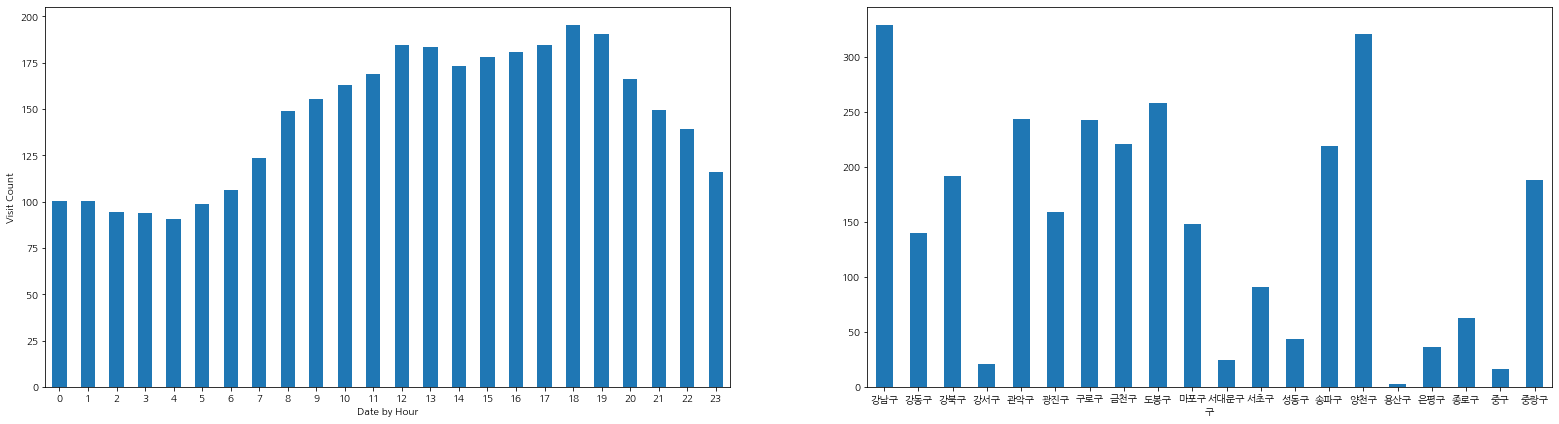

In [11]:
### Visualize the Data ###
fig, axs = plt.subplots(ncols=2)

sedf.groupby(sedf["Date"].dt.hour)["Visit_Count"].mean().plot(kind="bar", rot=0, ax=axs[0])
sedf.groupby("Gu")["Visit_Count"].mean().plot(kind="bar", rot=0, ax=axs[1])

axs[0].set_ylabel("Visit Count")
#axs[1].set_ylabel("Visit Count")

axs[0].set_xlabel("Date by Hour")
axs[1].set_xlabel("구")

fig.set_figheight(7)
fig.set_figwidth(27)

In [ ]:
### GeoDateframe from Spaital Enable Dateframe ###
from shapely.geometry import Point
gdf = GeoDataFrame(sedf.drop(["Long", "Lat"], axis=1), crs={'init': 'epsg:4326'}, geometry=[Point(xy) for xy in zip(sedf.Long, sedf.Lat)])
gdf.head()
#sedf.shape

c:\Users\esrikr\AppData\Local\ESRI\conda\envs\arcgispro-py3_ML\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,OID_,No,Serial,Site,Gu,Address,Type,Height,Sensor,Model_NM,Server_Type,Visit_Count,Date,Regist_Date,SHAPE,geometry
0,400000,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,카메라,SDOT001,00Original,55,2022-09-06 18:50:00,2022-09-06 18:52:00,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126....",POINT (126.94301 37.59116)
1,400001,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,카메라,SDOT001,00Original,55,2022-09-06 18:40:00,2022-09-06 18:42:00,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126....",POINT (126.94301 37.59116)
2,400002,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,카메라,SDOT001,00Original,56,2022-09-06 18:30:00,2022-09-06 18:32:00,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126....",POINT (126.94301 37.59116)
3,400003,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,카메라,SDOT001,00Original,69,2022-09-06 18:20:00,2022-09-06 18:22:00,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126....",POINT (126.94301 37.59116)
4,400004,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,카메라,SDOT001,00Original,47,2022-09-06 18:10:00,2022-09-06 18:12:00,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126....",POINT (126.94301 37.59116)


<AxesSubplot:>

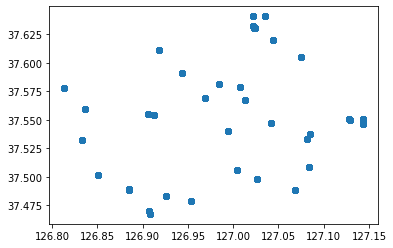

In [ ]:
gdf.plot()

In [ ]:
### explode the date into a set of categorical features ###
sedf["Date_Year"] = sedf.Date.dt.year
sedf["Date_Month"] = sedf.Date.dt.month
sedf["Date_Day"] = sedf.Date.dt.day
sedf["Date_Hour"] = sedf.Date.dt.hour
sedf["Date_Minute"] = sedf.Date.dt.minute
sedf["Date_Weekday"] = sedf.Date.dt.weekday

sedf.head()

,OID_,No,Serial,Site,Gu,Address,Type,Height,Lat,Long,...,Visit_Count,Date,Regist_Date,SHAPE,Date_Year,Date_Month,Date_Day,Date_Hour,Date_Minute,Date_Weekday
0,400000,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,...,55,2022-09-06 18:50:00,2022-09-06 18:52:00,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126....",2022,9,6,18,50,1
1,400001,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,...,55,2022-09-06 18:40:00,2022-09-06 18:42:00,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126....",2022,9,6,18,40,1
2,400002,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,...,56,2022-09-06 18:30:00,2022-09-06 18:32:00,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126....",2022,9,6,18,30,1
3,400003,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,...,69,2022-09-06 18:20:00,2022-09-06 18:22:00,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126....",2022,9,6,18,20,1
4,400004,49,OC3CL200228,4049,서대문구,서울특별시 서대문구 홍제동 294-46,유동인구,3.5,37.59116,126.943006,...,47,2022-09-06 18:10:00,2022-09-06 18:12:00,"{""spatialReference"": {""wkid"": 4326}, ""x"": 126....",2022,9,6,18,10,1


In [ ]:
### Setting Model ###

#from sklearn import linear_model
#lr_model = linear_model.LinearRegression()
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
### Split data for Training and Testing ###
train_data, test_data = train_test_split(sedf, test_size=0.01, random_state=101)

print(f'Shape of training data: {train_data.shape}')
print(f'Shape of test data: {test_data.shape}')

Shape of training data: (246475, 23)
Shape of test data: (2490, 23)


In [ ]:
### Set X(Features) and Y(Prediction Target) Column ###
x_feature = ["Date_Year", "Date_Month", "Date_Day", "Date_Hour", "Date_Minute", "Date_Weekday", "Site"]

#train_x = train_data.iloc[:,-4:-2]
train_x = train_data[x_feature]
train_y = train_data.Visit_Count
#test_x = test_data.iloc[:,-4:-2]
test_x = test_data[x_feature]
test_y = test_data.Visit_Count

train_x.describe()

,Date_Year,Date_Month,Date_Day,Date_Hour,Date_Minute,Date_Weekday,Site
count,246475.0,246475.000000,246475.000000,246475.000000,246475.000000,246475.000000,246475.000000
mean,2022.0,8.434795,15.684503,11.882402,25.319485,2.797760,3554.314316
std,0.0,0.495731,8.889996,6.806237,17.053463,1.989625,504.756285
min,2022.0,8.000000,1.000000,0.000000,0.000000,0.000000,2992.000000
25%,2022.0,8.000000,8.000000,6.000000,10.000000,1.000000,3018.000000
50%,2022.0,8.000000,16.000000,12.000000,30.000000,3.000000,4002.000000
75%,2022.0,9.000000,24.000000,18.000000,40.000000,4.000000,4032.000000
max,2022.0,9.000000,31.000000,23.000000,50.000000,6.000000,4051.000000


In [ ]:

# Define model. Specify a number for random_state to ensure same results each run
#seoul_model = DecisionTreeRegressor(random_state=1)
seoul_model = RandomForestRegressor(random_state=2)
# Fit model
seoul_model.fit(train_x, train_y)

RandomForestRegressor(random_state=2)

In [ ]:
### Evaluation on Training Set
#seoul_pred_train = seoul_model.predict(train_x)
#print('Training Set Evaluation F1-Score: ', f1_score(train_y,seoul_pred_train, average='micro'))
#seoul_pred_test = seoul_model.predict(test_x)
#print('Testing Set Evaluation F1-Score: ', f1_score(test_y, seoul_pred_test, average='micro'))

seoul_preds = seoul_model.predict(test_x)
print(mean_absolute_error(test_y, seoul_preds))

17.155883534136542


In [ ]:
### View Prection Result ###
print("Making <Visit Count> predictions for the following 5 records")
print(test_x.head())
print("The Predctions are")
print(seoul_model.predict(test_x.head()))
print("The Real Values are ")
print(test_y.head())

Making <Visit Count> predictions for the following 5 records
        Date_Year  Date_Month  Date_Day  Date_Hour  Date_Minute  Date_Weekday  \
90831        2022           9        14          1           40             2   
111046       2022           9         9          6           50             4   
152874       2022           9         3          1           10             5   
87053        2022           8        16         11           40             1   
183374       2022           9        21         16           30             2   

        Site  
90831   4042  
111046  4048  
152874  4023  
87053   3012  
183374  3037  
The Predctions are
[  2.12  22.8    0.   223.05 238.75]
The Real Values are 
90831       7
111046     34
152874      0
87053     260
183374    238
Name: Visit_Count, dtype: int64


In [ ]:
today = datetime.datetime.today()
predictList = [
    [today.strftime("%Y"), today.strftime("%m"), today.strftime("%d"), today.strftime("%H"), today.strftime("%M"), today.weekday(), "4042"],
    #[2022, 11, 2, 14, 00, 3, 4042]
]
predictDf = pd.DataFrame(predictList, columns=x_feature)
print("Making <Visit Count> predictions for the following records")
print(predictDf)
print("The Predctions are")
print(seoul_model.predict(predictDf.head()))

Making <Visit Count> predictions for the following records
  Date_Year Date_Month Date_Day Date_Hour Date_Minute  Date_Weekday  Site
0      2022         11       02        15          02             2  4042
The Predctions are
[83.3]
